[pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/index.html)

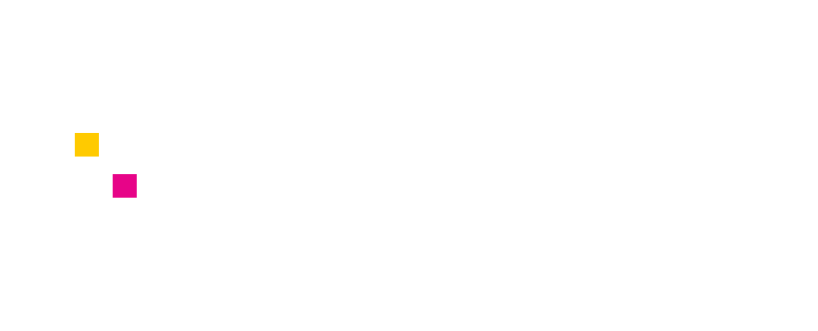

In [1]:
import pandas as pd
import numpy as np
from numpy import nan as NaN
from IPython.display import Image, SVG
SVG(filename=r"D:\✓\Python\Backup\Libs\Pandas\pandas_white.svg")

# Intro

### Series(data, index, name)

In [ ]:
pd.Series?

In [ ]:
pd.Series??

In [ ]:
pd.Series()

In [ ]:
pd.Series().empty

In [ ]:
pd.Series(5)

In [ ]:
pd.Series('ali')

In [ ]:
pd.Series([12, 8, 19])

In [ ]:
pd.Series(['ali', 'asma', 'fateme'])

In [ ]:
pd.Series(data=['ali', 'asma', 'fateme'])

In [ ]:
#..........

In [ ]:
s = pd.Series([12, 8, 19])

In [ ]:
s.values

In [ ]:
s.index

In [ ]:
s = pd.Series(['ali', 'asma', 'fateme'])

In [ ]:
s.values

In [ ]:
s.index

In [ ]:
#..........

In [ ]:
s = pd.Series(data=[8, 12, 17, 19], index=['ali', 'taha', 'sara', 'omid'], name='myser')
s

In [ ]:
s.values

In [ ]:
s.index

In [ ]:
len(s)

In [ ]:
s.size

In [ ]:
s.shape

In [ ]:
s.shape[0]

In [ ]:
s.count()

In [ ]:
s.is_monotonic_increasing

In [ ]:
s.is_monotonic_decreasing

In [ ]:
s.describe()

In [ ]:
s.name = 'first seri'; s

In [ ]:
s.index.name = 'Index'; s

In [ ]:
s.isin([8])

In [ ]:
s.isin([12, 19])

In [ ]:
8 in s

In [ ]:
8 in s.values

In [ ]:
s.dtype

In [ ]:
s['taha'] = None
display(s, s.dtype)

same index & value

In [ ]:
# same value

In [ ]:
s = pd.Series(data=['ali', 'taha', 'ali', 'sara', 'omid', 'ali'])
s

In [ ]:
s == 'ali'

In [ ]:
s[s == 'ali']

In [ ]:
s.is_unique

In [ ]:
s.unique()

In [ ]:
s.nunique()

In [ ]:
s.count()

In [ ]:
s.values

In [ ]:
s.value_counts()

In [ ]:
s.mode()

In [ ]:
# same index

In [ ]:
s = pd.Series(data=[12, 8, 19, 17], index=['ali', 'ali', 'sara', 'omid']); s

In [ ]:
s.index.is_unique

In [ ]:
s['ali']

serie with other types data

In [ ]:
pd.Series(np.array(['A', 'B', 'C']))

In [ ]:
pd.Series(['A', 'B', 'C'])

In [ ]:
pd.Series(('A', 'B', 'C'))

In [ ]:
# pd.Series({'A', 'B', 'C'})       TypeError: 'set' type is unordered
pd.Series(list({'A', 'B', 'C'}))

In [ ]:
pd.Series({0: 'A', 1: 'B', 2: 'C'})

In [ ]:
d = {'ali' : 12, 'taha' : 8, 'sara' : 19 , 'omid' : 17}
pd.Series(data=d)

In [ ]:
d = {'Iran': 'Tehran', 'Germany': 'Berlin', 'France': 'Paris'}
pd.Series(d)

In [ ]:
#..........

In [ ]:
s = pd.Series(['A', 'B', 'C']); s

In [ ]:
tuple(s)

In [ ]:
list(s)

In [ ]:
dict(s)

index & slice

In [ ]:
s = pd.Series(data=[12, 8, 19, 17], index=['ali', 'taha', 'sara', 'omid']); s

In [ ]:
s['taha']

In [ ]:
s['taha':'sara']

In [ ]:
s['taha':]

In [ ]:
s.loc['taha']

In [ ]:
s.loc['taha':'sara']

In [ ]:
s

In [ ]:
s.iloc[1]

In [ ]:
s.iloc[1:2]

In [ ]:
s[1:2]

In [ ]:
s[1:3]

In [ ]:
s[:2]

In [ ]:
s[:]

In [ ]:
s[1]

In [ ]:
#..........

In [ ]:
s = pd.Series(data=[12, 8, 19, 17]); s

In [ ]:
s[1]

In [ ]:
s[1:3]

In [ ]:
s.iloc[1]

In [ ]:
s.iloc[1:3]

change & append value

In [ ]:
s = pd.Series([7, 14, 19, 17], ['ali', 'taha', 'sara', 'omid'])
s

In [ ]:
s['ali'] = 10
s

In [ ]:
s.iloc[0] = 11
s

In [ ]:
s.iloc[0:1] = 12
s

In [ ]:
s.iloc[2:] = 20
s

In [ ]:
s = pd.Series([7, 14, 19, 17], ['ali', 'taha', 'sara', 'omid'])
s

In [ ]:
s['asma'] = 20
s

In [ ]:
s = pd.Series([7, 14, 19, 17])
s

In [ ]:
s[4] = 10
s

In [ ]:
s[5] = 13; s

# Functions

### set_axis (labels)

In [ ]:
s = pd.Series([12, 8, 19, 17], ['ali', 'taha', 'sara', 'omid'])
s

In [ ]:
s.set_axis?

In [ ]:
s.set_axis??

In [ ]:
s.set_axis(['ali', 'ali', 'sara', 'omid'])

In [ ]:
s.set_axis(['mahdi', 'taha', 'sara', 'omid'])

### reset_index(level, drop, inplace)

In [ ]:
s = pd.Series([12, 8, 19, 17], ['ali', 'taha', 'sara', 'negar'])
s

In [ ]:
s.reset_index(drop=True)

In [ ]:
#..........

In [ ]:
s = pd.Series([12, 8, 19, 17], [['ali', 'taha', 'sara', 'negar'], ['b', 'b', 'g', 'g']])
s

In [ ]:
s.reset_index(drop=True)

In [ ]:
s.reset_index(level=[0, 1], drop=True)

In [ ]:
s.reset_index(level=0, drop=True)

In [ ]:
s.reset_index(level=1, drop=True)

### reindex (index, method, fill_value, limit, level)

In [ ]:
s = pd.Series([12, 8, 19], ['ali', 'taha', 'sara'])
s

In [ ]:
s.reindex(['sara', 'ali'])

In [ ]:
s.reindex(['sara', 'ali', 'taha'])

In [ ]:
s.reindex(['sara', 'ali', 'sara'])

In [ ]:
s.reindex(['sara', 'omid', 'taha'])

In [ ]:
s.reindex(['ali', 'taha', 'mahsa', 'omid'])

In [ ]:
s.reindex(['ali', 'taha', 'mahsa', 'omid'], fill_value=0)

*method & limit*

In [ ]:
i1 = pd.date_range('1/1/2010', periods=8, freq='D')
i2 = pd.date_range('12/29/2009', periods=13, freq='D')
s = pd.Series(data=[100, 101, 95, 100, 89, NaN, 92, 88], index=i1)
display(i1, i2, s)

In [ ]:
s.pop('2010-01-04')

In [ ]:
s.reindex(index=i2)

In [ ]:
s.reindex(index=i2, fill_value=0)

In [ ]:
s.reindex(index=i2, method='nearest')

In [ ]:
s.reindex(index=i2, method='ffill')

In [ ]:
s.reindex(index=i2, method='bfill')

In [ ]:
s.reindex(index=i2, method='bfill', limit=1)

In [ ]:
s.reindex(index=i2, method='bfill', limit=2)

### rename(index, inplace, level)

In [ ]:
s = pd.Series([12, 8, 19], ['ali', 'taha', 'sara'])
s

In [ ]:
s.rename({'taha': "x"})

In [ ]:
s.rename({'ali': "x", 'taha': "y", 'sara': "z"})

In [ ]:
s.rename(str.upper)

In [ ]:
l = lambda x: '|'+x+'|'
s.rename(l)

MultiIndex

In [ ]:
s = pd.Series([12, 8, 19], [['ali', 'taha', 'sara'], ['x', 'y', 'z']])
s

In [ ]:
s.rename({'ali': 'a'})

In [ ]:
s.rename({'x': '.'})

In [ ]:
s.rename({'ali': 'a', 'x': '.'})

In [ ]:
l = lambda x: '|'+x+'|'
s.rename(l)

In [ ]:
l = lambda x: '|'+x+'|'
s.rename(l, level=0)

In [ ]:
l = lambda x: '|'+x+'|'
s.rename(l, level=1)

### rename_axis (index, inplace)

In [ ]:
s = pd.Series([12, 8, 19], ['ali', 'taha', 'sara'])
s

In [ ]:
s.rename_axis('name')

In [ ]:
s.rename_axis('name', inplace=True)
s

In [ ]:
s.rename_axis(index=str.upper)

MultiIndex

In [ ]:
s = pd.Series([12, 8, 19], [['ali', 'taha', 'sara'], ['x', 'y', 'z']])
s

In [ ]:
s.rename_axis(['name', 'no'], inplace=True)
s

In [ ]:
s.rename_axis(index={'name': 'esm'})

In [ ]:
s.rename_axis(index=str.upper)

### delete

drop (labels)

In [ ]:
s = pd.Series([12, 8, 19, 17], index=['ali', 'taha', 'sara', 'omid'])
s

In [ ]:
s.drop('omid')

In [ ]:
s

In [ ]:
s.drop(['ali','taha'])

In [ ]:
s

pop (item)

In [ ]:
s = pd.Series([12, 8, 19, 17], index=['ali', 'taha', 'sara', 'omid'])
s

In [ ]:
s.pop('ali')

In [ ]:
s

### NaN

is & not ()

In [ ]:
s = pd.Series([12, NaN, 5, NaN, 7, 9, NaN], index=['a', 'b', 'c', 'd', 'e', NaN, 'f'])
s

In [ ]:
s.isna()

In [ ]:
s.isnull()

In [ ]:
s.notna()

In [ ]:
s.notnull()

size & count()

In [ ]:
len(s)

In [ ]:
s.size

In [ ]:
s.count()

dropna (inplace, ignore_index)

In [ ]:
s

In [ ]:
s.dropna()

In [ ]:
s.dropna(ignore_index=True)

In [ ]:
#..........

In [ ]:
s = pd.Series([15, NaN, 9, 18, NaN, 20])
s

In [ ]:
s.dropna()

In [ ]:
s.dropna(ignore_index=True)

In [ ]:
s

In [ ]:
s.dropna(inplace=True, ignore_index=True)
s

fillna (value, inplace, limit)

In [ ]:
s = pd.Series([12, NaN, 5, NaN, 7, NaN], index=['a', 'b', 'c', 'd', 'e', 'f'])
s

In [ ]:
s.fillna(0)

In [ ]:
# limit: maximam tedade maghadire motavalie NaN baraye por kardan be jelo/aghab.

In [ ]:
s.fillna('o', limit=1)

In [ ]:
s.fillna('o', limit=2)

In [ ]:
s.fillna('o', limit=3)

In [ ]:
#..........

In [ ]:
s

In [ ]:
s.mean()

In [ ]:
s.fillna(s.mean())

### ffill & bfill (inplace, limit)

In [ ]:
s = pd.Series([NaN, 12, NaN, NaN, 5, NaN, 7, NaN], index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
s

In [ ]:
s.ffill()

In [ ]:
s

In [ ]:
s.bfill()

In [ ]:
# limit

In [ ]:
s

In [ ]:
s.ffill(limit=1)

In [ ]:
s.ffill(limit=2)

In [ ]:
s

In [ ]:
s.bfill(limit=1)

In [ ]:
s.bfill(limit=2)

### replace (to_replace, value, inplace)

In [ ]:
s = pd.Series([NaN, 15, 9, NaN, 18, 7, 20, NaN])
s

In [ ]:
s.replace(9, 10)

In [ ]:
s.replace(NaN, 0)

In [ ]:
s.replace([9, NaN], 0)

In [ ]:
s.replace([9, NaN], [10, 0])

In [ ]:
s.replace({9: 10})

In [ ]:
s.replace({9: 10, NaN: 0})

### duplicate 

2 same value

In [ ]:
myser = pd.Series(['a','b','a','c','d','a','c'])
myser

In [ ]:
myser.unique()

In [ ]:
myser.values

In [ ]:
myser.value_counts()

In [ ]:
# duplicated(keep)

In [ ]:
myser.duplicated()

In [ ]:
myser.where(myser.duplicated())

In [ ]:
myser.duplicated(keep='last')

In [ ]:
myser.where(myser.duplicated(keep='last'))

In [ ]:
# drop_duplicates(keep, inplace, ignore_index)

In [ ]:
myser

In [ ]:
myser.drop_duplicates()

In [ ]:
myser.drop_duplicates(ignore_index=True)

In [ ]:
myser

In [ ]:
myser.drop_duplicates(keep='last')

In [ ]:
myser.drop_duplicates(keep='last', ignore_index=True)

..........

In [ ]:
s = pd.Series([12, 4, 12, 20, 7, 12, 7, 5, 4])
s

In [ ]:
s.unique()

In [ ]:
s.values

In [ ]:
s.value_counts()

In [ ]:
s.duplicated()

In [ ]:
s.duplicated(keep='last')

In [ ]:
s.drop_duplicates()

..........

In [ ]:
s = pd.Series([12, 4, 12, 20, 7, 12, 7, 5], index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
s

In [ ]:
s.unique()

In [ ]:
s.values

In [ ]:
s.value_counts()

In [ ]:
s.duplicated()

In [ ]:
s.duplicated(keep='last')

In [ ]:
s.drop_duplicates()

In [ ]:
s.drop_duplicates(keep='last')

In [ ]:
s.drop_duplicates(ignore_index=True)

### copy()

In [ ]:
s = pd.Series([12, 4, 5], index=['a', 'b', 'c'])
s

In [ ]:
sc = s.copy()

In [ ]:
s['b']=89
s

In [ ]:
sc

### squeeze()

In [ ]:
s = pd.Series(data=[12, 8, 19, 17], index=['ali', 'ali', 'sara', 'omid'])
s

In [ ]:
s.squeeze()

In [ ]:
s['sara']

In [ ]:
s['sara':'sara']

In [ ]:
s['sara':'sara'].squeeze()

In [ ]:
#..........

In [ ]:
s = pd.Series([12], index=['ali'])
s

In [ ]:
s.squeeze()

### head & tail (n)

In [ ]:
s = pd.Series(range(10, 101, 10))
s

In [ ]:
# head: Return the first n rows.

In [ ]:
s.head()

In [ ]:
s.head(3)

In [ ]:
s.head(7)

In [ ]:
# tail: Return the last n rows.

In [ ]:
s.tail()

In [ ]:
s.tail(2)

In [ ]:
s.tail(6)

### astype(category)

In [ ]:
n = ['ali', 'ali', 'ali', 'ali', 'sara', 'sara', 'sara', 'taha', 'taha']

In [ ]:
s = pd.Series(n)
s

In [ ]:
c = s.astype('category')
c

In [ ]:
c.values.categories

In [ ]:
c.value_counts()

In [ ]:
c.values.codes

In [ ]:
c.isin(['sara'])

In [ ]:
c[c.isin(['sara'])]

In [ ]:
c[c.isin(['sara'])].cat.remove_unused_categories()

### sort_...()

#### sort_index (level, ascending, inplace, na_position, sort_remaining, ignore_index, key)

In [ ]:
s = pd.Series([12, 4, 9, 7], index=[None, 'a', 'c', 'b'])
s

In [ ]:
s.sort_index()

In [ ]:
s.sort_index(ascending=False)

In [ ]:
s.sort_index()

In [ ]:
s.sort_index(na_position='first')

In [ ]:
s.sort_index(ascending=False, na_position='first')

In [ ]:
s.sort_index()

In [ ]:
s.sort_index(ignore_index=True)

key

In [ ]:
s = pd.Series([1, 2, 3, 4], index=['A', 'b', 'C', 'd'])
s

In [ ]:
s.sort_index()

In [ ]:
s.sort_index(key=lambda x : x.str.lower())

level & sort_remaining

In [ ]:
d = {('d', 'two'): 1,
     ('d', 'one'): 2,
     ('c', 'two'): 3,
     ('c', 'one'): 4,
     ('b', 'two'): 5,
     ('b', 'one'): 8,
     ('a', 'two'): 7,
     ('a', 'one'): 6}

In [ ]:
s = pd.Series(d)
s

In [ ]:
s.sort_index(level=1)

In [ ]:
s.sort_index(level=1, sort_remaining=False)

In [ ]:
s.sort_index(level=0)

In [ ]:
s.sort_index(level=0, sort_remaining=False)

#### sort_values (ascending, inplace, na_position, ignore_index, key)

In [ ]:
s = pd.Series([12, 4, None, 7], index=['b', 'a', 'd', 'c'])
s

In [ ]:
sorted(s)

In [ ]:
s.sort_values()

In [ ]:
s.sort_values(ascending=False)

In [ ]:
s.sort_values(ignore_index=True)

In [ ]:
s.sort_values()

In [ ]:
s.sort_values(na_position='first')

In [ ]:
s.sort_values(ascending=False, na_position='first')

key

In [ ]:
s = pd.Series(['a', 'B', 'c', 'D', 'e'])
s

In [ ]:
s.sort_values()

In [ ]:
s.sort_values(key=lambda x: x.str.lower())

In [ ]:
#..........

In [ ]:
s = pd.Series([4, -3, 0, 2, -4])
s

In [ ]:
s.sort_values()

In [ ]:
s.sort_values(key=np.abs)

In [ ]:
s.sort_values(key=np.sin)

rank: rank of values in s.sort_values()

In [ ]:
s = pd.Series([12, 4, None, 7], index=['b', 'a', 'd', 'c'])
s

In [ ]:
s.sort_values()

In [ ]:
s.rank()        

### value_counts (normalize, sort, ascending, bins, dropna)

In [ ]:
s = pd.Series([12, 14, 18, 11, 14, 20, 19, None, 14, 19, 10])
s

In [ ]:
s.value_counts()

In [ ]:
s.value_counts(sort=False)

In [ ]:
s.value_counts(ascending=True)

In [ ]:
s.value_counts(normalize=True)

In [ ]:
s.value_counts(normalize=True).mul(100)

In [ ]:
s.value_counts(dropna=False)

In [ ]:
s.value_counts(bins=3)

In [ ]:
s.value_counts(bins=3).sort_index()

In [ ]:
s.value_counts(bins=[5, 10, 15, 20]).sort_index()

In [ ]:
#..........

In [ ]:
pd.cut(s, 3)

In [ ]:
pd.cut(s, 3).value_counts()

In [ ]:
#..........

In [ ]:
c = pd.cut(s.values, 3)
c

In [ ]:
c.codes

In [ ]:
c.categories

In [ ]:
c.value_counts()

### take (indices)

In [ ]:
s = pd.Series(range(10, 51, 10))
s

In [ ]:
s.take([4, 3, 2, 1, 0])

In [ ]:
s.take([2, 4, 0, 1, 3])

In [ ]:
i = np.random.permutation(5)
i

In [ ]:
s.take(i)

In [ ]:
#..........

In [ ]:
s = pd.Series(range(10, 51, 10), ['a', 'b', 'c', 'd', 'e'])
s

In [ ]:
s.take([4, 3, 2, 1, 0])

In [ ]:
s.take([2, 4, 0, 1, 3])

In [ ]:
i = np.random.permutation(5)
i

In [ ]:
s.take(i)

### sample(n, frac, replace, random_state, ignore_index)

In [ ]:
s = pd.Series(range(10, 101, 10))
s

n

In [ ]:
s.sample()

In [ ]:
s.sample(3)

In [ ]:
s.sample(n=3)

In [ ]:
s.sample(n=7)

frac

In [ ]:
s.sample(frac=0.4)

In [ ]:
s.sample(frac=4/10)

replace

In [ ]:
s.sample(n=12)   # error

In [ ]:
s.sample(n=12, replace=True)

In [ ]:
s.sample(frac=1.5, replace=True)

In [ ]:
#..........

In [ ]:
s.sample(n=9)               # entekhabe 3 nemoone bedoone jaygozari.

In [ ]:
s.sample(n=3, replace=True) # entekhabe 3 nemoone ba jaygozari (ehtemale entekhabe nemoone tekrari).

random_state

In [ ]:
'dar chand bar run kardane selloole zir, har bar natayeje motafaveti migirim:'

In [ ]:
s.sample(n=3)                      

In [ ]:
'ba dastoore random_state, ba har bar run kardane sellool, haman natije bare avval hasel mishavad:'

In [ ]:
s.sample(n=3, random_state=1)   

### add_...fix (...fix)

In [ ]:
s = pd.Series([10, 20, 30, 40])
s

In [ ]:
s.add_prefix('item_')

In [ ]:
s.add_suffix('_item')

### math

In [ ]:
a = pd.Series([1, 10, np.nan, 3])

In [ ]:
a + 5

In [ ]:
a / 2

In [ ]:
(a / 2).round()

In [ ]:
a.add(5)

In [ ]:
a.add(5, fill_value=0)

In [ ]:
a.subtract(3)

In [ ]:
a.multiply(4)

In [ ]:
a.divide(2)

In [ ]:
a.pow(3)

In [ ]:
a.mod(5)

2 series

In [ ]:
a = pd.Series([1, 10, None, 7,  3])
b = pd.Series([4,  5,   6,  2, None, 9])

In [ ]:
a + b

In [ ]:
a // b

In [ ]:
a.add(b)

In [ ]:
a.add(b, fill_value=0)

In [ ]:
a.sub(b, fill_value=0)

In [ ]:
a.mul(b)

In [ ]:
a.mul(b, fill_value=1)

In [ ]:
a.div(b)

In [ ]:
a.floordiv(b)

In [ ]:
a.pow(b)

In [ ]:
a.mod(b)

In [ ]:
#..........

In [ ]:
a = pd.Series([1, 10, 3], index=['a','b','c'] )
b = pd.Series([4, 5, 6], index=['a','b','d'] )

In [ ]:
a

In [ ]:
b

In [ ]:
a.add(b)

In [ ]:
a.add(b, fill_value=0)

### describe()

In [ ]:
s = pd.Series([12, 4, 5, np.NaN, 7, 2], index=['a', 'b', 'c', 'a', 'e', 'b'])
s

In [ ]:
s.describe()

In [ ]:
s.sum()

In [ ]:
s.count()

In [ ]:
s.mean()

In [ ]:
s.std()

In [ ]:
s.min()

In [ ]:
s.quantile(.25)

In [ ]:
s.quantile([.5, .75])

In [ ]:
s.max()

In [ ]:
s.var()

In [ ]:
s.median()

In [ ]:
s.mode()

### eq , ne , gt , ge , lt , le , between

In [ ]:
s = pd.Series([8, 2, 12, 6, 5, 4])

In [ ]:
s == 8

In [ ]:
s.eq(8)

In [ ]:
s != 8

In [ ]:
s.ne(8)

In [ ]:
s > 6

In [ ]:
s.gt(6)

In [ ]:
s >= 6

In [ ]:
s.ge(6)

In [ ]:
s < 8

In [ ]:
s.lt(8)

In [ ]:
s <= 8

In [ ]:
s.le(8)

In [ ]:
s.between(6, 12)

2 series

In [ ]:
s1 = pd.Series([8, 2, 12, 6, 5, 4])
s2 = pd.Series([20, 2, 7, 6, 2, 17])

In [ ]:
s1.eq(s2)

In [ ]:
s1.ge(s2)

In [ ]:
s1.lt(s2)

### argmax , argmin() , idxmin() , idxmax()

In [ ]:
s = pd.Series({'Java' : 15, 'C++' : 20, 'Python' : 12 , 'Pascal' : 9})
s

In [ ]:
s.idxmax()

In [ ]:
s.argmax()

In [ ]:
s.idxmin()

In [ ]:
s.argmin()

### cumsum , cumprod , cummax , cummin

In [ ]:
s = pd.Series([3, 2, np.nan, 5, 0, 1])
s

In [ ]:
s.cumsum()

In [ ]:
s.cumprod()

In [ ]:
s.cummax()

In [ ]:
s.cummin()

### diff (periods)

In [ ]:
s = pd.Series([1, 1, 2, 3, 2, 8])
s

In [ ]:
s.diff()

In [ ]:
s.diff(3)

In [ ]:
s.diff(-1)

### where ()

In [ ]:
s = pd.Series([12, 4, 5, np.NaN, 7, 2], index=['a', 'b', 'c', 'a', 'e', 'b'])
s

In [ ]:
s >= 5

In [ ]:
s[s >= 5]

In [ ]:
s.where(s >= 5)

In [ ]:
#..........

In [ ]:
s.lt(7)

In [ ]:
s[s.lt(7)]

In [ ]:
s.where(s.lt(7))

In [ ]:
#..........

In [ ]:
s.between(5, 20)

In [ ]:
s[s.between(5, 20)]

In [ ]:
s.where(s.between(5, 20))

### combine (other, func, fill_value)

In [ ]:
s1 = pd.Series([8, 2, 12, 6, 5, 4])
s2 = pd.Series([20, 2, 7, 6, 2, 17])

In [ ]:
s1.combine(s2, max)

In [ ]:
s1 = pd.Series({'ali' : 16 , 'sara' : 17})
s2 = pd.Series({'ali' : 19 , 'sara' : 15 , 'taha' : 18})

In [ ]:
s1.combine(s2, max)

In [ ]:
s1.combine(s2, max, fill_value=0)

In [ ]:
myfunc = lambda x, y: x + y
s1.combine(s2, myfunc)

In [ ]:
myfunc = lambda x, y: x + y
s1.combine(s2, myfunc, fill_value=0)

### apply (func, args, kwargs)

In [ ]:
pd.Series([25.4, 7.7, 80]).apply(round)

In [ ]:
pd.Series([25.4, 7.7, 80]).apply('min')

In [ ]:
#..........

In [ ]:
s = pd.Series([25, 7, 80])

In [ ]:
s

In [ ]:
s.apply(np.sqrt)

In [ ]:
s.apply(np.square)

In [ ]:
#..........

In [ ]:
s

In [ ]:
def f(x):
    return x**2
s.apply(f)

In [ ]:
lam = lambda x: x**2
s.apply(lam)

In [ ]:
#..........

In [ ]:
s

In [ ]:
myfunc = lambda x: x - 2
s.apply(myfunc)

In [ ]:
myfunc = lambda x, y: x - y
s.apply(myfunc, args=(2,))

In [ ]:
#..........

In [ ]:
s

In [ ]:
def f(r, **kwargs):
    for i in kwargs:
        r += kwargs[i]
    return r       
s.apply(f, x=3, y=2)

### map(func)

In [ ]:
s = pd.Series([25, 7, 80])
s

In [ ]:
f = lambda x: x-5
s.map(f)

### transform (func, args, kwargs)

In [ ]:
s = pd.Series([10, 4, 9])

In [ ]:
s.transform(np.sqrt)

In [ ]:
s.transform([np.sqrt])

In [ ]:
s.transform([np.sqrt, np.square])

In [ ]:
lam = lambda x: x**2
s.transform([lam])

In [ ]:
s.transform([np.sqrt, np.square, lam])

### agg=aggregate (func, args, kwargs)

In [ ]:
s = pd.Series([10, 4, 9, 2, 18, 6])
s.agg('min')

In [ ]:
s = pd.Series([10, 4, 9, 2, 18, 6])
s.agg(['min'])

In [ ]:
s = pd.Series([10, 4, 9, 2, 18, 6])
s.agg(['min', 'max', 'sum', 'average'])

### nlargest (n, keep)

In [ ]:
data = {'a' : 6, 'b' : 3 , 'c' : 8 , 'd' : 5 , 'e' : 9 , 'f' : 3 , 'g':5 , 'h' : 4 , 'i' : 5}
s = pd.Series(data)
s

In [ ]:
s.nlargest()

In [ ]:
s.nlargest(1)

In [ ]:
s.nlargest(4)

In [ ]:
s.nlargest(4, keep='all')

In [ ]:
s.nlargest(4, keep='last')

In [ ]:
s.nsmallest()

..........

In [ ]:
s = pd.Series([15, 9, 18, 20, 12, 5, 25, 17, 10, 15])
s

In [ ]:
s.nlargest()

In [ ]:
s.nsmallest()

### to_...()

to_list

In [ ]:
s = pd.Series([15, 90, 18, 20])
s

In [ ]:
s.to_list()

In [ ]:
s.tolist()

In [ ]:
list(s)

to_dict

In [ ]:
s = pd.Series([15, 9, 18, 20])
s

In [ ]:
s.to_dict()

In [ ]:
dict(s)

In [ ]:
d = {0: 15, 1: 9, 2: 18, 3: 20}
pd.Series(d)

In [ ]:
#..........

In [ ]:
s = pd.Series([15, 9, 18, 20], ['a', 'b', 'c', 'c'])
s

In [ ]:
s.to_dict()

to_frame

In [ ]:
s = pd.Series([15, 9, 18, 20], ['a', 'b', 'c', 'c'])
s

In [ ]:
f = s.to_frame()
f

In [ ]:
type(f)

to_numpy

In [ ]:
s = pd.Series([15, 90, 18, 20])
s

In [ ]:
s.to_numpy()

In [ ]:
np.array(s)

In [ ]:
#..........

In [ ]:
s = pd.Series([15, 90, 18, 20], ['a', 'b', 'c', 'c'])
s

In [ ]:
s.to_numpy()

### groupby (by, level, dropna)

In [ ]:
d = [220, 180, 230, 200]
i = ['BMW', 'BMW', 'Benz', 'Benz']
s = pd.Series(d, i, name='MaxSpeed')
s

In [ ]:
s.groupby(i)

In [ ]:
list(s.groupby(i))

In [ ]:
# seri.groupby().func()

In [ ]:
s.groupby(i).apply(lambda x: x)

In [ ]:
s.groupby(level=0).apply(lambda x: x)

In [ ]:
s.groupby(s > 200).apply(lambda x: x)

In [ ]:
s.groupby(["a", "b", "a", "b"]).apply(lambda x: x)

In [ ]:
s.groupby(i).describe()

In [ ]:
s.groupby(s > 200).describe()

In [ ]:
s.groupby(s > 200).max()

In [ ]:
s.groupby(level=0).max()

In [ ]:
s.groupby(level=0).mean()

In [ ]:
s.groupby(level=0).sum()

In [ ]:
#..........

In [ ]:
s.index.name = 'Brand'
s

In [ ]:
s.groupby('Brand').apply(lambda x: x)

In [ ]:
s.groupby('Brand').max()

..........

In [ ]:
s = pd.Series([1, 2, 3, 3], index=["a", 'a', 'b', NaN])
s

In [ ]:
s.groupby(level=0).apply(lambda x: x)

In [ ]:
s.groupby(level=0, dropna=False).apply(lambda x: x)

In [ ]:
s.groupby(level=0).sum()

In [ ]:
s.groupby(level=0, dropna=False).sum()

..........

In [ ]:
city = ['Kermanshah', 'Hamedan', 'Oromieh', 'Mashad', 'Yazd', 'Kerman','Zabol']
s = pd.Series([2, 3, 1, 6, 4, 5, 1], index=city)
s

In [ ]:
k = ['W', 'W', 'W', 'E', 'E', 'E', 'E']

In [ ]:
s.groupby(k).apply(lambda x: x)

In [ ]:
s.groupby(k).describe()

In [ ]:
s.groupby(k).mean()

In [ ]:
f = lambda x: x+x.mean()
s.groupby(k).apply(f)

In [ ]:
s[['Oromieh', 'Yazd', 'Zabol']] = NaN
s

In [ ]:
s.groupby(k).mean()

In [ ]:
f = lambda x: x.fillna(x.mean())
s.groupby(k).apply(f)

In [ ]:
d = {'W': 10, 'E': 20}
f = lambda x: x.fillna(d[x.name])
s.groupby(k).apply(f)

..........

In [ ]:
score = [16, 12, 13, 14, 20, 16, 17, 5, 19, 7]
sc = pd.cut(score, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
sc

In [ ]:
s1 = pd.Series(score)
s2 = pd.Series(sc)
display(s1, s2)

In [ ]:
s1.groupby(s2).apply(lambda x: x)

In [ ]:
s1.groupby(s2, observed=True).apply(lambda x: x)

In [ ]:
s1.groupby(s2, observed=True).apply(lambda x: [x.max(), x.count()])

In [ ]:
s1.groupby(s2, observed=True).agg(['min', 'count'])

In [ ]:
s1.groupby(s2, observed=True).agg(['min', 'count']).reset_index()

MultiIndex

In [ ]:
d = [220, 180, 230, 200]
l = [['BMW','BMW','Benz','Benz'] , ['A','B','A','B']]
mi = pd.MultiIndex.from_arrays(l, names=('Brand', 'Class'))
mi

In [ ]:
s = pd.Series(d, mi)
s

In [ ]:
s.groupby('Brand').apply(lambda x: x)

In [ ]:
s.groupby('Brand').describe()

In [ ]:
s.groupby(level='Brand').max()

In [ ]:
s.groupby(level=0).max()

In [ ]:
s.groupby(level='Class').max()

In [ ]:
s.groupby(level=1).max()